In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('quezon_merged_all_months.csv')

## Performing EDA to Quezon Agricultural Commodities
The dataset provided was cleaned and transformed prior to `transform.ipynb`. 

Refer to the mentioned file for the step-by-step process of Data Cleaning and Transforming

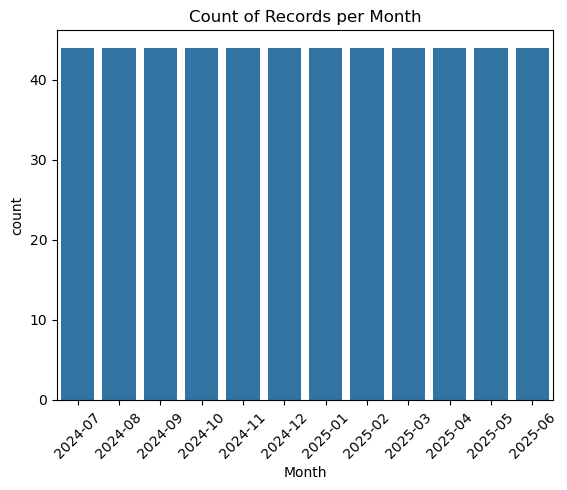

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

# Count by month
df['Month'] = df['Date'].dt.to_period('M')
sns.countplot(data=df, x='Month')
plt.xticks(rotation=45)
plt.title("Count of Records per Month")
plt.show()

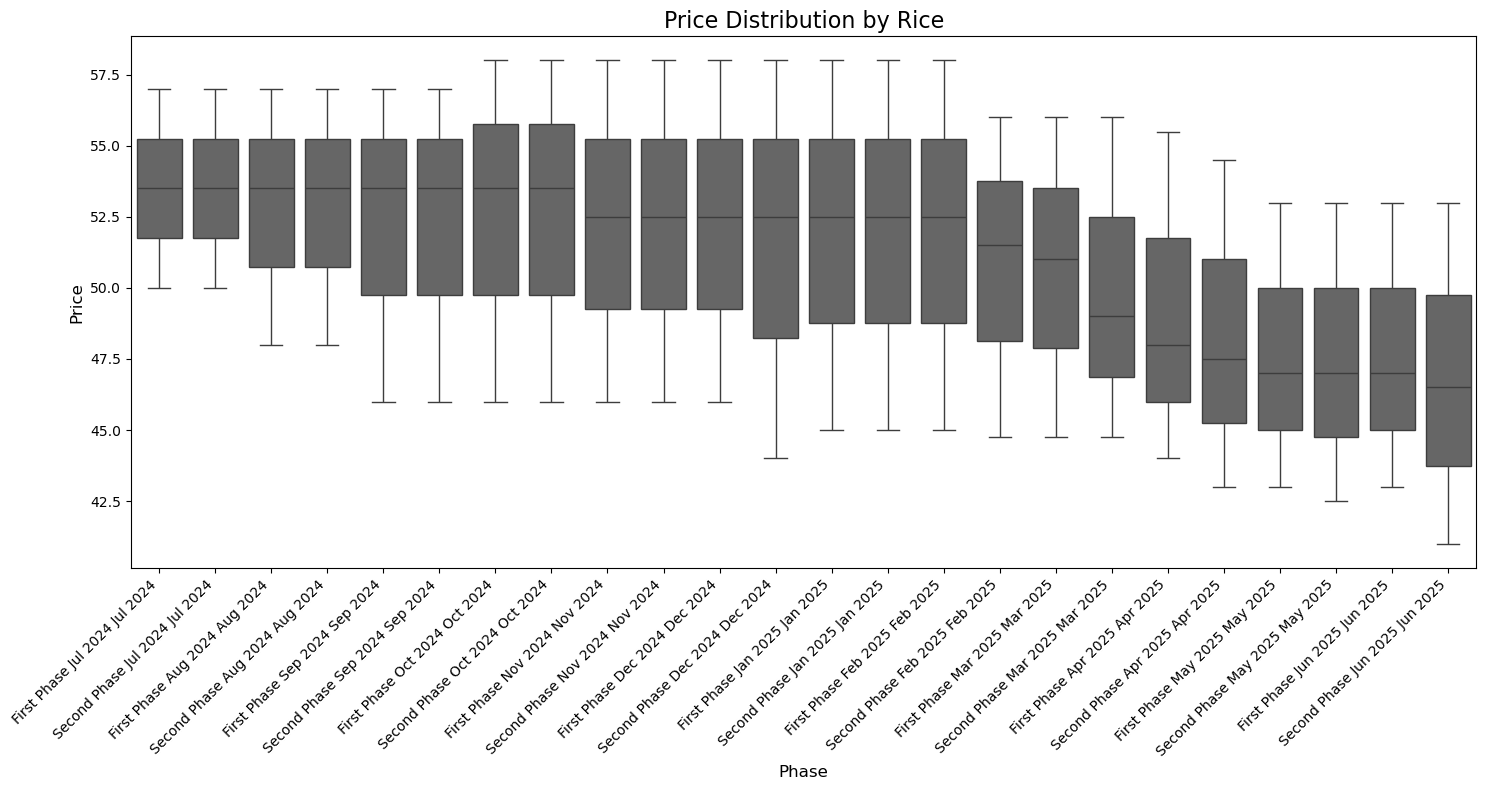

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

# Create a full, descriptive phase label for the x-axis
df['Phase_Full'] = df['Phase'] + ' ' + df['Date'].dt.strftime('%b %Y')


# Get the unique, sorted list of full phase names.
sorted_phases = df.sort_values('Date')['Phase_Full'].unique()

# Convert 'Phase_Full' column to ordered categorical type
df['Phase_Full'] = pd.Categorical(df['Phase_Full'], categories=sorted_phases, ordered=True)


# Filter the data for 'Rice' only
df_rice = df[df['CommodityType'] == 'rice'].copy()


# Create the Boxplot
plt.figure(figsize=(15, 8)) # Increase figure size for better label readability
sns.boxplot(data=df_rice, x='Phase_Full', y='Price', color='#666666')
plt.title('Price Distribution by Rice', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

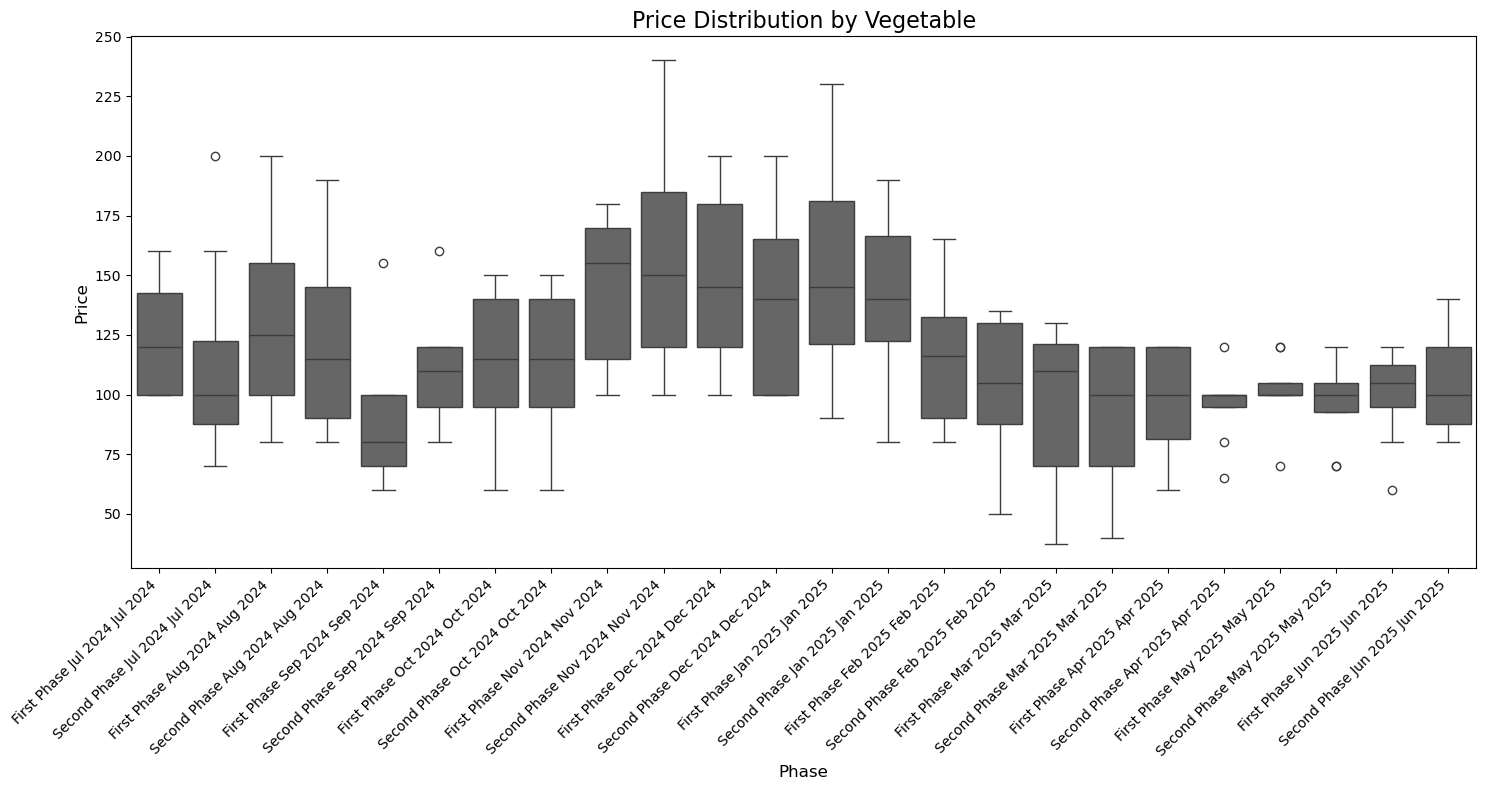

In [53]:
df_veg = df[df['CommodityType'] == 'veg'].copy()


# Create the Boxplot
plt.figure(figsize=(15, 8)) # Increase figure size for better label readability
sns.boxplot(data=df_veg, x='Phase_Full', y='Price', color='#666666')
plt.title('Price Distribution by Vegetable', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

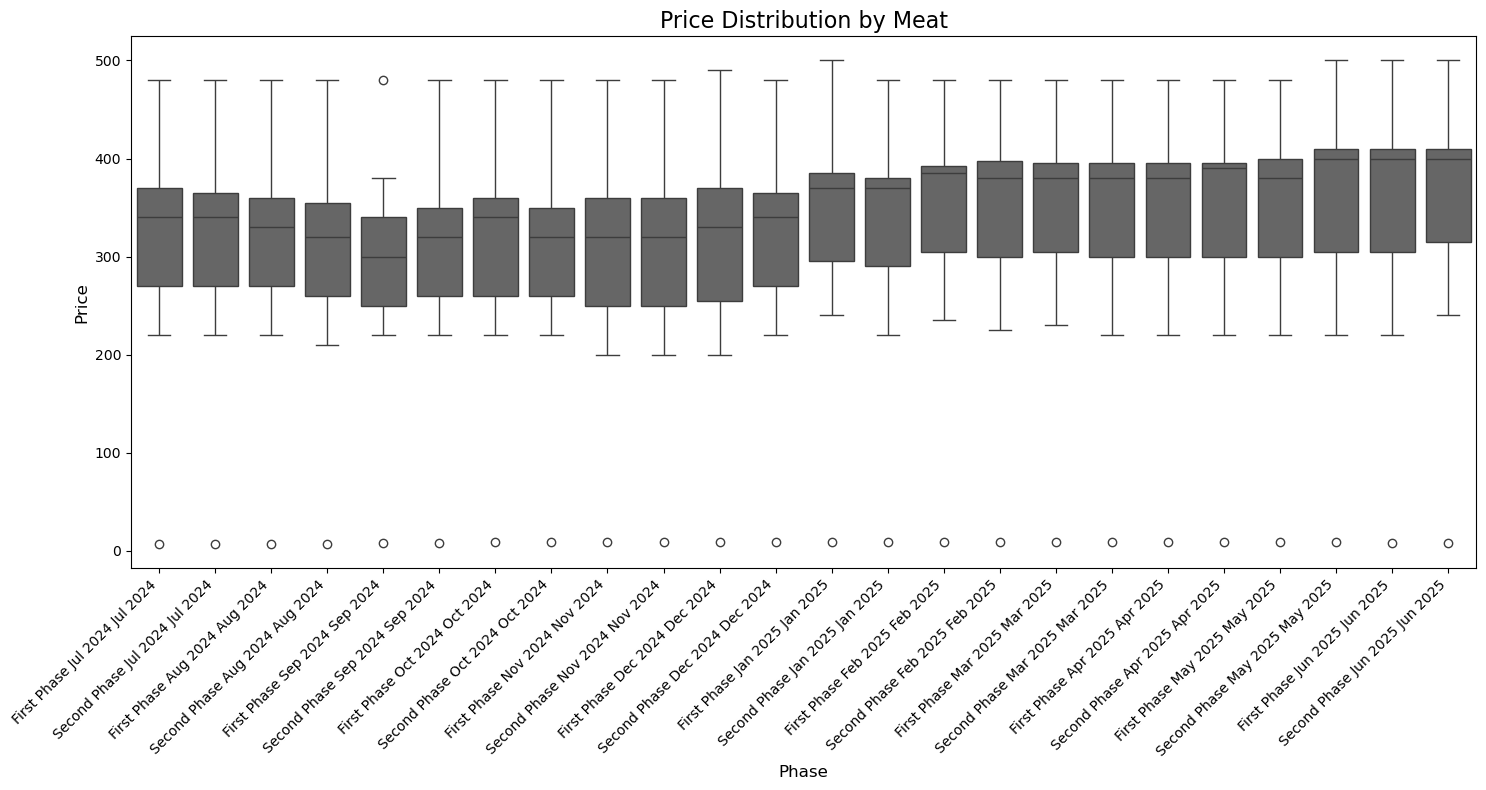

In [52]:
df_meat = df[df['CommodityType'] == 'meat'].copy()


# Create the Boxplot
plt.figure(figsize=(15, 8)) # Increase figure size for better label readability
sns.boxplot(data=df_meat, x='Phase_Full', y='Price', color='#666666')
plt.title('Price Distribution by Meat', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

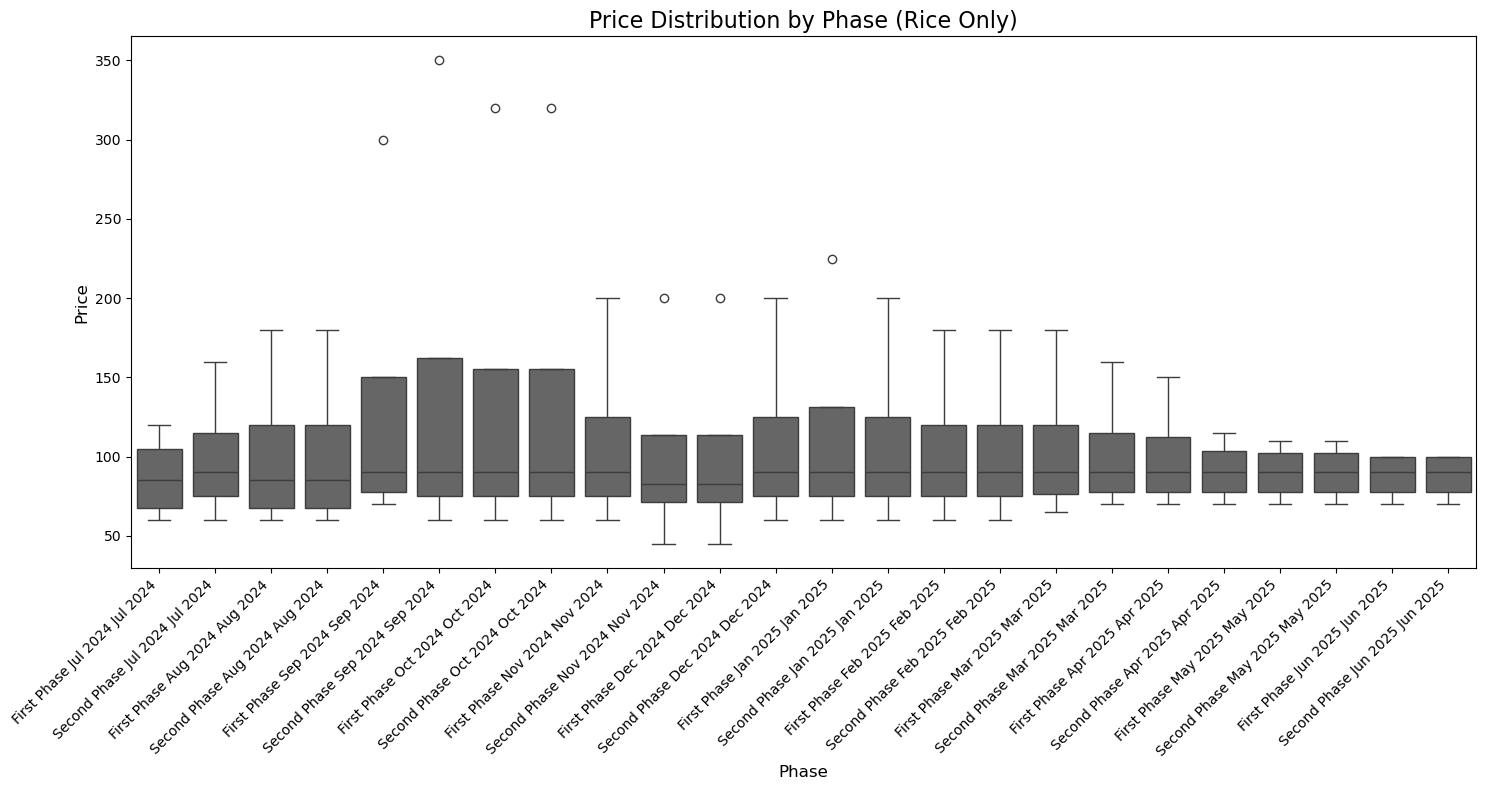

In [ ]:
df_fruit = df[df['CommodityType'] == 'fruits'].copy()


# Create the Boxplot
plt.figure(figsize=(15, 8)) # Increase figure size for better label readability
sns.boxplot(data=df_fruit, x='Phase_Full', y='Price', color='#666666')
plt.title('Price Distribution by Fruit', fontsize=16)
plt.xlabel('Phase', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

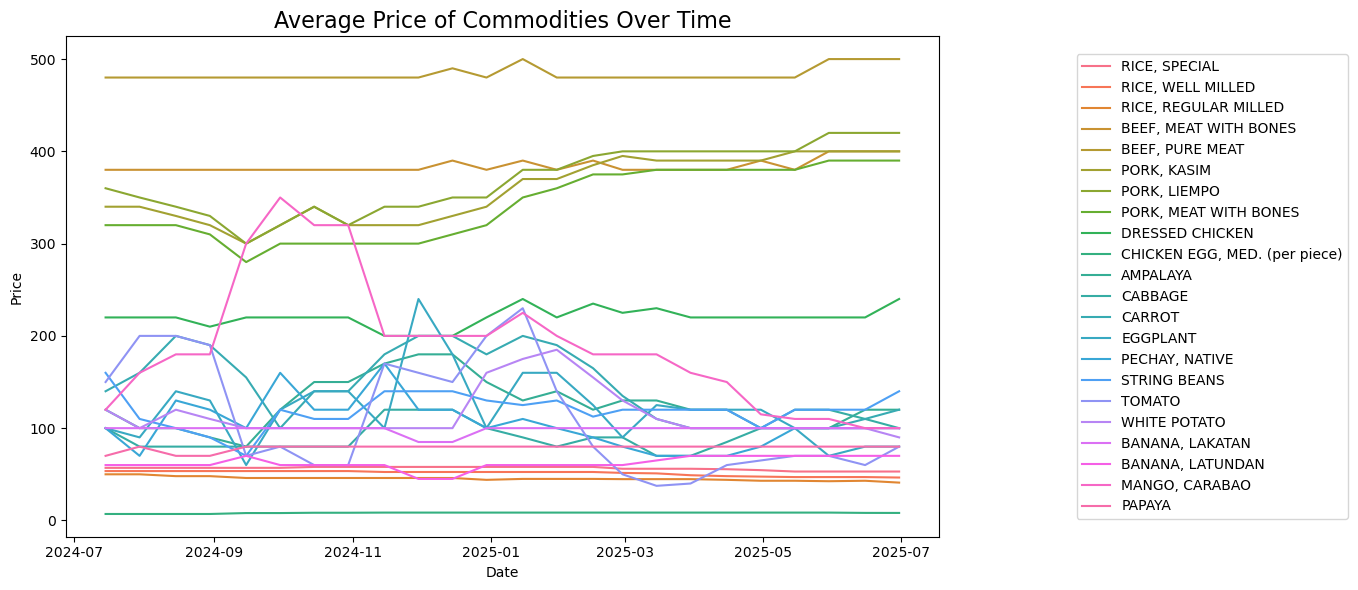

In [55]:
df_grouped = df.groupby(['Commodity', 'Date'])['Price'].mean().reset_index()

plt.figure(figsize=(14, 6))
ax = sns.lineplot(data=df, x='Date', y='Price', hue='Commodity')

# Far right legend
ax.legend(
    loc='center left',
    bbox_to_anchor=(1.15, 0.5)
)
plt.title('Average Price of Commodities Over Time', fontsize=16)
plt.tight_layout()
plt.show()